In [4]:
import pandas as pd
import seaborn as sns

In [13]:
digits = pd.read_csv("../data/mnist.csv")
digits.head()

,timestamp,img_path,prediction,true_label,confidence,corrected
0,09/04/2025,./images/image0.png,7,4,0.794120,True
1,09/04/2025,./images/image1.png,2,2,0.872318,True
2,09/10/2025,./images/image2.png,2,1,0.443951,True
3,09/10/2025,./images/image3.png,1,1,0.893086,True
4,09/10/2025,./images/image4.png,1,1,0.815207,True


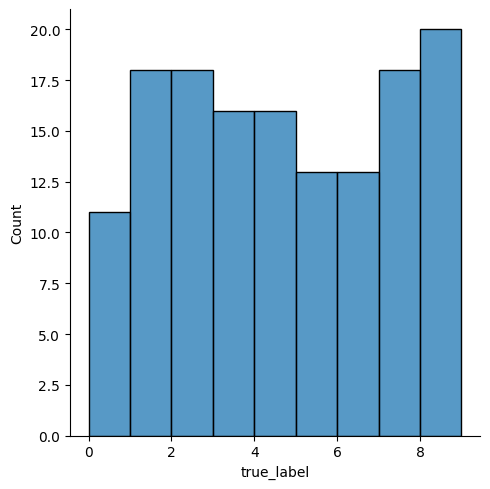

In [14]:
sns.displot(digits, x="true_label")